In [70]:
%load_ext autoreload
%autoreload 2
import sys, os, platform
import os
import sys
module_path = os.path.abspath(os.path.join('../spectraltree'))
if module_path not in sys.path:
    sys.path.append(module_path)
#sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'spectraltree'))
#sys.path.append(os.path.join(sys.path[0],'spectraltree'))
import pickle
import reconstruct_tree as rt
import utils
import generation
import compare_methods
import numpy as np
from dendropy.interop import raxml
from dendropy.model.discrete import simulate_discrete_chars, Jc69
from dendropy.calculate.treecompare import symmetric_difference
import seaborn as sns
import matplotlib.pylab as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
m = 256
num_reps = 10
tree_list = [utils.unrooted_pure_kingman_tree(utils.default_namespace(m), m) for i in np.arange(0,num_reps,1)]
print(len(tree_list))
jc = generation.Jukes_Cantor()
delta_vec = np.arange(0.95,0.99,0.01)
print(delta_vec)
NJ = rt.NeighborJoining(rt.JC_similarity_matrix)
SNJ = rt.SpectralNeighborJoining(rt.JC_similarity_matrix)
methods = [NJ,SNJ]
mutation_rates = [jc.similarity2t(delta)  for delta in delta_vec]
Ns = [1000]
results = compare_methods.experiment(tree_list = tree_list, sequence_model = jc, Ns = Ns, methods=methods, mutation_rates = mutation_rates, reps_per_tree=1)




10
[0.95 0.96 0.97 0.98 0.99]
==== Beginning Experiment =====
	 Transition:  Jukes Cantor
	 10 trees
	 1 sample sizes: 1000
	 2 methods <reconstruct_tree.NeighborJoining object at 0x7f60cc5e8c50> <reconstruct_tree.SpectralNeighborJoining object at 0x7f60cc5e8f98>
	 5 mutation rates: 0.0128 0.0102 0.0076 0.0051 0.0025
	 1 reps
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 1

In [26]:
import pickle

f = open('../data/coal_m_256_scan_delta.pckl', 'wb')
pickle.dump(results, f)
f.close()

In [8]:
f = open('../data/coal_m_256_scan_delta.pckl','rb')
results = pickle.load(f)

delta
0.95    20
0.96    20
0.97    20
0.98    20
0.99    20
Name: RF, dtype: int64


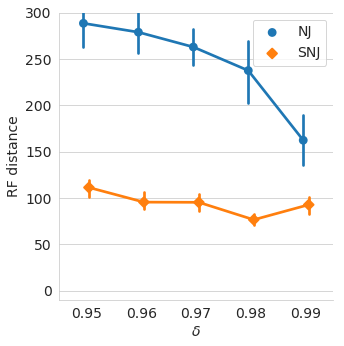

In [68]:
jc = generation.Jukes_Cantor()
df = compare_methods.results2frame(results)
df['delta'] = np.round((1-4/3*df['rate'])**3,2)
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 14})
h = compare_methods.accuracy(df,x="delta",y="RF")
h.set(ylim=(-10,300))
new_labels = ['NJ', 'SNJ']
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, new_labels)
plt.ylabel('RF distance')
plt.xlabel(r'$\delta$')
plt.savefig('../data/coalescent_delta_scan_m_256_n_1000.eps',format='eps')